In [1]:
#Installing libreries we are going to use in this file
!pip install yfinance
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install datetime
!pip install numpy
!pip install scikit-learn
!pip install scipy
!pip install keras
!pip install setuptools


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 43.1 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 3.4 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.3-cp310-cp310-linux_x86_64.whl size=293152 sha256=fa0e078d33308004407fdc0fc5d11fb803bbcfc0cd1826d82f1de6ad2b3c046d
  Stored in directory: /root/.cache/pip/wheels/0d/32/b7/cad9f818b37cf97df4c87a8308da86a433af81651d98f8d8aa
Successfully built peewee
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.3/247.3 kB 10.6 MB/s eta 0:00:00


In [2]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

**All the function are here**

In [3]:

data_dict = {}
def calculate_rsi(data, window=14):
    delta = data['Adj Close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_ma50(data, window=50):
    return data['Adj Close'].rolling(window=window).mean()
def calculate_ma20(data, window=20):
    return data['Adj Close'].rolling(window=window).mean()
def calculate_ma10(data, window=10):
    return data['Adj Close'].rolling(window=window).mean()

def get_data(tck):
    ticker = tck
    data = ticker.split(".")[0]
    
    # Get the data
    data_dict[data] = yf.download(ticker, start="1996-01-01", end=datetime.now())

    # Calculate RSI and MA
    data_dict[data]['RSI'] = calculate_rsi(data_dict[data])
    data_dict[data]['MA50'] = calculate_ma50(data_dict[data])
    data_dict[data]['MA20'] = calculate_ma20(data_dict[data])
    data_dict[data]['MA10'] = calculate_ma10(data_dict[data])
    data_dict[data]=data_dict[data].dropna()
    data_dict[data]['Daily Return'] = data_dict[data]['Adj Close'].pct_change()
    data_dict[data]['company_name']=data

def get_table(company):
    return data_dict[company]


def plot_column_from_dataframes(data_dict, column_name):
    """
    Plot the specified column from all DataFrames in data_dict.

    Parameters:
        data_dict (dict): A dictionary where keys are ticker symbols and values are DataFrames.
        column_name (str): The name of the column to plot from each DataFrame.
    """
    # Iterate over each item in data_dict
    for ticker, data in data_dict.items():
        # Create a new figure for each ticker symbol
        plt.figure()
        
        # Extract the specified column from the DataFrame
        column_data = data[column_name]
        
        # Plot the column data
        plt.plot(data.index, column_data, linewidth=1)
        
        # Add labels and title
        plt.xlabel("Date")
        plt.ylabel(column_name)
        plt.title(f"{column_name} for {ticker}")
        
        # Show the plot
        plt.show()


def plot_multicolumn_company(data_dict, ticker, column_names):
    """
    Plot the specified columns from a DataFrame in data_dict.

    Parameters:
        data_dict (dict): A dictionary where keys are ticker symbols and values are DataFrames.
        ticker (str): The ticker symbol for the DataFrame.
        column_names (list): A list of column names to plot from the DataFrame.
    """
    # Get the DataFrame for the specified ticker symbol
    data = data_dict[ticker]
    
    # Create a new figure
    plt.figure()
    
    # Plot each column from the DataFrame
    for column_name in column_names:
        plt.plot(data.index, data[column_name], label=column_name, linewidth=1)
    
    # Add labels and title
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.title(f"Columns for {ticker}")
    
    # Add legend
    plt.legend()
    
    # Show the plot
    plt.show()


def correlation_matrix(data_dict, column_name):
    """
    Calculate the correlation matrix between the specified column in DataFrames in data_dict.

    Parameters:
        data_dict (dict): A dictionary where keys are ticker symbols and values are DataFrames.
        column_name (str): The name of the column for which correlation matrix is calculated.

    Returns:
        pd.DataFrame: Correlation matrix between the specified column in DataFrames.
    """
    # Create an empty DataFrame to store correlations
    correlations = pd.DataFrame(index=data_dict.keys(), columns=data_dict.keys())
    
    # Calculate correlation between each pair of DataFrames
    for ticker1, data1 in data_dict.items():
        for ticker2, data2 in data_dict.items():
            # Calculate correlation only if ticker1 and ticker2 are different
            if ticker1 != ticker2:
                correlation = data1[column_name].corr(data2[column_name])
                correlations.loc[ticker1, ticker2] = correlation
    
    # Set diagonal entries to 1
    correlations = correlations.fillna(1)
    
    return correlations




def multi_in_one(data_dict, column_name):
    """
    Create a new DataFrame with the specified column from all DataFrames in data_dict.

    Parameters:
        data_dict (dict): A dictionary where keys are ticker symbols and values are DataFrames.
        column_name (str): The name of the column to extract from each DataFrame.

    Returns:
        pd.DataFrame: New DataFrame with specified column from all DataFrames.
    """
    # Initialize an empty DataFrame to store the specified column
    close_df = pd.DataFrame()
    
    # Iterate over each item in data_dict
    for ticker, data in data_dict.items():
        # Add the specified column to the close_df with the DataFrame name as column name
        close_df[ticker] = data[column_name]
    close_df=close_df.dropna()
    return close_df


def create_joint_plots(jointplt_df):
    """
    Create joint plots comparing each column in close_df to every other column.

    Parameters:
        close_df (pd.DataFrame): DataFrame containing "Close" columns from different DataFrames.

    Returns:
        None
    """
    # Iterate over each column in close_df
    for i, col1 in enumerate(jointplt_df.columns):
        # Start the inner loop from the index of the outer loop plus 1
        for j, col2 in enumerate(jointplt_df.columns[i + 1:], start=i + 1):
            # Create a joint plot comparing the columns
            sns.jointplot(x=col1, y=col2, data=jointplt_df, kind='scatter', color='seagreen')
    
    # Show the plots
    plt.show()




def create_correlation_heatmap(dataframe):
    """
    Create a correlation heatmap between columns in the DataFrame.

    Parameters:
        dataframe (pd.DataFrame): DataFrame containing data.

    Returns:
        None
    """
    # Compute the correlation matrix
    corr_matrix = dataframe.corr()

    # Set up the matplotlib figure
    plt.figure(figsize=(10, 8))

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)

    # Add title
    plt.title('Correlation Heatmap')

    # Show plot
    plt.show()





In [4]:


#get the data of stock with the help of ticker symbol of the respective stock

get_data("TATAMOTORS.NS")
get_data("EICHERMOT.NS")
get_data("MARUTI.NS")
get_data("M&M.NS")

[*********************100%%**********************]  1 of 1 completed
/tmp/ipykernel_24/1612051865.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dict[data]['Daily Return'] = data_dict[data]['Adj Close'].pct_change()
/tmp/ipykernel_24/1612051865.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dict[data]['company_name']=data
[*********************100%%**********************]  1 of 1 completed
/tmp/ipykernel_24/1612051865.py:30: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [5]:
get_table("EICHERMOT")

,Open,High,Low,Close,Adj Close,Volume,RSI,MA50,MA20,MA10,Daily Return,company_name
Date,,,,,,,,,,,,
1996-03-08,4.600000,4.600000,4.500000,4.550000,1.483655,54000,52.123551,1.254162,1.512513,1.554904,NaN,EICHERMOT
1996-03-11,4.550000,4.525000,4.425000,4.510000,1.470613,90000,45.901706,1.260096,1.518057,1.542187,-0.008791,EICHERMOT
1996-03-12,4.510000,4.675000,4.495000,4.555000,1.485286,121000,47.826098,1.266259,1.525067,1.527839,0.009978,EICHERMOT
1996-03-13,4.500000,4.600000,4.500000,4.600000,1.499959,38000,28.260709,1.272455,1.529959,1.515448,0.009879,EICHERMOT
1996-03-14,4.600000,4.675000,4.550000,4.675000,1.524415,39000,40.853635,1.279139,1.533219,1.509416,0.016305,EICHERMOT
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-12,4310.000000,4382.799805,4267.799805,4302.250000,4302.250000,1133493,76.685548,3900.396997,3960.794995,4093.964990,-0.002978,EICHERMOT
2024-04-15,4250.000000,4317.850098,4193.750000,4219.350098,4219.350098,860133,67.866074,3910.688999,3984.984998,4113.969995,-0.019269,EICHERMOT
2024-04-16,4217.399902,4404.000000,4206.299805,4355.700195,4355.700195,1467677,70.234699,3921.011001,4014.137512,4154.875024,0.032315,EICHERMOT


In [6]:
get_table("TATAMOTORS")

,Open,High,Low,Close,Adj Close,Volume,RSI,MA50,MA20,MA10,Daily Return,company_name
Date,,,,,,,,,,,,
1996-03-08,81.059746,81.059746,80.120750,80.877693,59.205433,104367,58.797297,55.628840,59.299424,59.380087,NaN,TATAMOTORS
1996-03-11,80.877693,79.814140,78.587708,78.951805,57.795616,78536,50.328517,55.718619,59.178782,59.374476,-0.023812,TATAMOTORS
1996-03-12,78.951805,80.484848,78.443985,79.842888,58.447929,76188,53.188882,55.827618,59.103383,59.246822,0.011287,TATAMOTORS
1996-03-13,79.842888,81.059746,79.191345,80.801041,59.149338,81406,49.397636,55.954151,59.044115,59.205440,0.012001,TATAMOTORS
1996-03-14,80.801041,81.730453,79.890793,80.168663,58.686398,85320,40.000064,56.079422,58.968013,59.145821,-0.007827,TATAMOTORS
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-12,1014.000000,1029.000000,1013.500000,1018.500000,1018.500000,11575194,84.642704,960.390001,986.912503,1007.125000,0.004933,TATAMOTORS
2024-04-15,998.099976,1006.950012,978.500000,998.799988,998.799988,12632409,65.708978,963.189001,988.192502,1007.725000,-0.019342,TATAMOTORS
2024-04-16,990.000000,1004.900024,982.099976,992.799988,992.799988,9574762,56.565657,965.361001,989.445001,1007.779999,-0.006007,TATAMOTORS


In [7]:
get_table("MARUTI")

,Open,High,Low,Close,Adj Close,Volume,RSI,MA50,MA20,MA10,Daily Return,company_name
Date,,,,,,,,,,,,
2003-09-16,207.000000,210.000000,195.100006,208.500000,182.571365,4004037,27.208476,177.346422,197.757201,194.502002,NaN,MARUTI
2003-09-17,212.500000,219.500000,209.250000,216.050003,189.182480,3800473,39.637326,178.252712,197.365350,193.910945,0.036211,MARUTI
2003-09-18,215.899994,215.899994,203.399994,205.600006,180.032013,2813556,25.573788,178.928708,196.386820,192.514293,-0.048368,MARUTI
2003-09-19,207.000000,210.399994,198.800003,205.750000,180.163376,3442717,25.573809,179.496125,195.355753,190.452158,0.000730,MARUTI
2003-09-22,206.000000,212.800003,205.750000,210.699997,184.497757,2575343,36.084236,180.069669,194.902607,188.871622,0.024058,MARUTI
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-12,12660.000000,12660.000000,12225.000000,12266.549805,12266.549805,973366,56.654653,11565.616973,12214.707422,12584.149805,-0.032816,MARUTI
2024-04-15,12199.500000,12510.000000,12032.950195,12422.849609,12422.849609,831257,60.020617,11615.040957,12266.342383,12566.399805,0.012742,MARUTI
2024-04-16,12308.000000,12549.900391,12275.349609,12502.700195,12502.700195,579183,53.718726,11661.356953,12321.247412,12559.709863,0.006428,MARUTI


In [8]:
get_table("M&M")

,Open,High,Low,Close,Adj Close,Volume,RSI,MA50,MA20,MA10,Daily Return,company_name
Date,,,,,,,,,,,,
1996-03-08,34.299999,34.250000,33.781250,34.181252,22.261999,15600,42.762401,19.873059,22.559764,22.777336,NaN,M&M
1996-03-11,34.181252,33.125000,31.912500,32.356251,21.073391,16000,32.046967,19.763479,22.605354,22.507456,-0.053392,M&M
1996-03-12,32.356251,32.375000,31.687500,31.943750,20.804733,33600,30.365649,19.656097,22.592125,22.188323,-0.012749,M&M
1996-03-13,31.943750,32.625000,31.881250,32.625000,21.248432,16400,35.159216,19.747197,22.518854,21.976654,0.021327,M&M
1996-03-14,32.625000,33.487499,32.756248,33.062500,21.533365,9600,36.887537,19.845705,22.455964,21.872039,0.013410,M&M
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-12,2084.000000,2087.500000,2051.649902,2070.949951,2070.949951,4008660,86.903384,1858.985007,1935.427496,2013.069983,-0.002529,M&M
2024-04-15,2055.250000,2083.899902,2035.000000,2053.449951,2053.449951,2024919,80.957079,1867.647007,1945.414996,2026.279980,-0.008450,M&M
2024-04-16,2047.050049,2073.750000,2027.750000,2031.300049,2031.300049,1981730,74.423450,1875.242007,1952.452496,2037.814990,-0.010787,M&M


In [9]:
get_table("TATAMOTORS").columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'RSI', 'MA50',
       'MA20', 'MA10', 'Daily Return', 'company_name'],
      dtype='object')

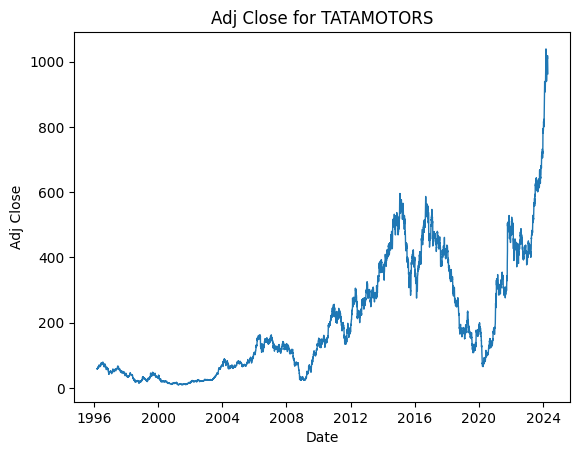

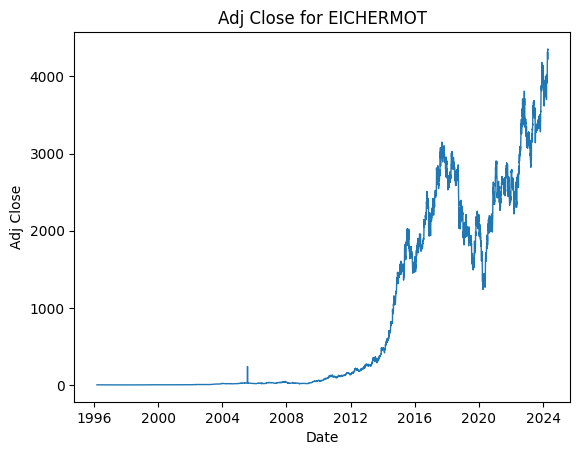

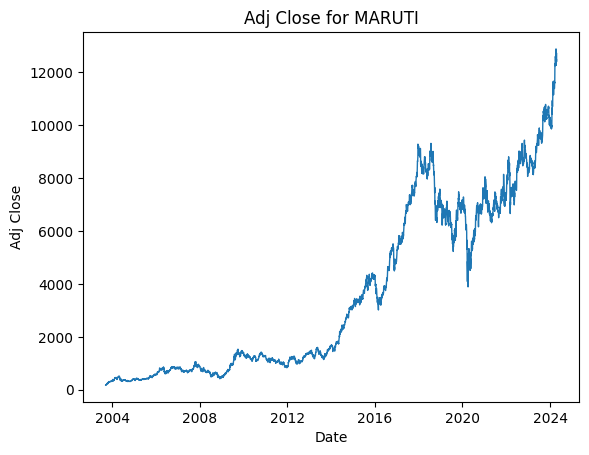

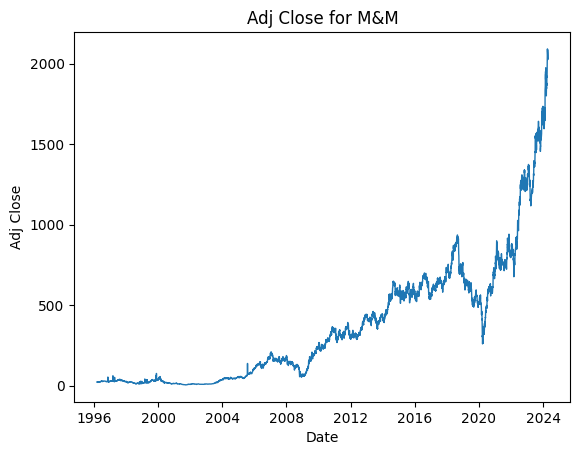

In [10]:
plot_column_from_dataframes(data_dict, "Adj Close")

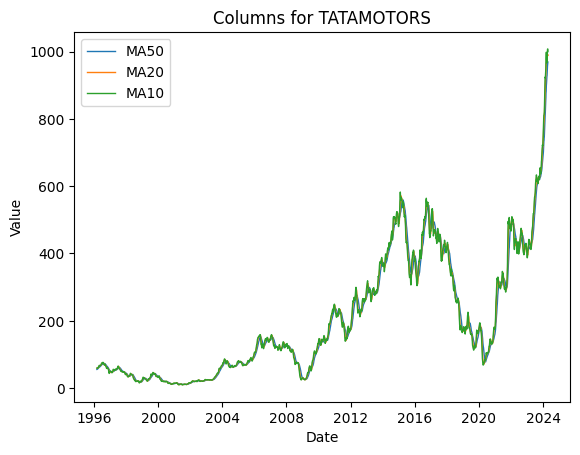

In [11]:
plot_multicolumn_company(data_dict, "TATAMOTORS", ["MA50", "MA20", "MA10"])


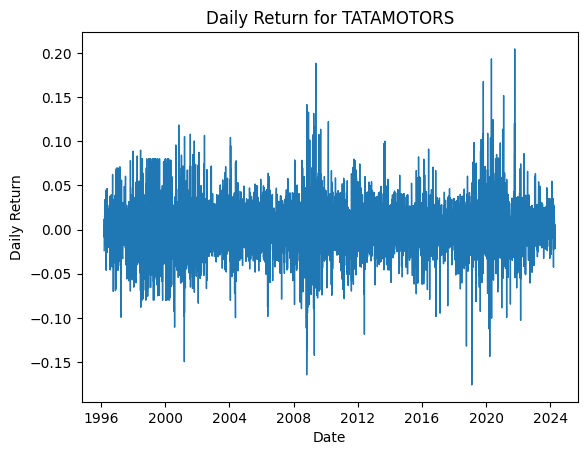

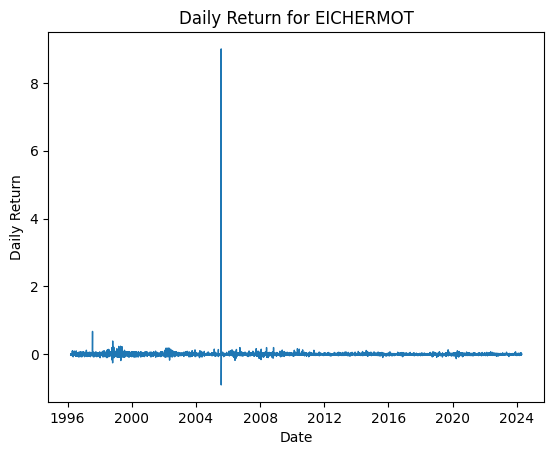

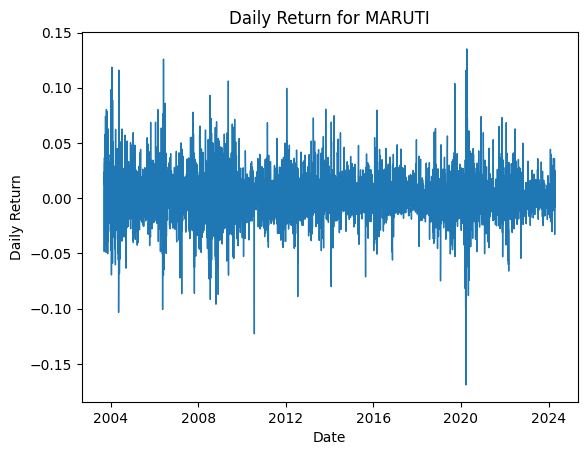

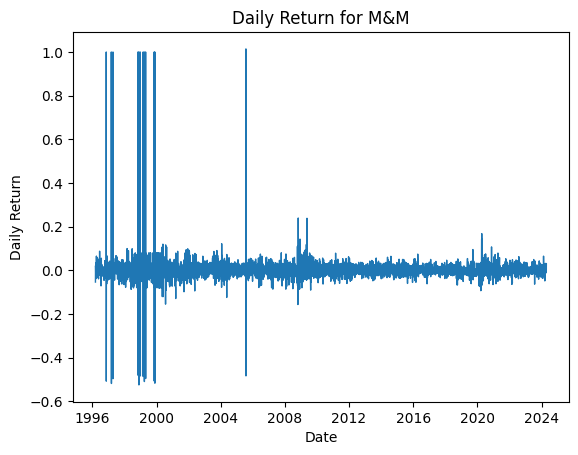

In [12]:
plot_column_from_dataframes(data_dict, "Daily Return")

In [13]:
# Example usage:
correlation_matrix(data_dict, "Daily Return")


/tmp/ipykernel_24/1612051865.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  correlations = correlations.fillna(1)


,TATAMOTORS,EICHERMOT,MARUTI,M&M
TATAMOTORS,1.000000,0.076379,0.478357,0.213941
EICHERMOT,0.076379,1.000000,0.063995,0.267572
MARUTI,0.478357,0.063995,1.000000,0.406143
M&M,0.213941,0.267572,0.406143,1.000000


In [14]:
# Example usage:
Daily_Return = multi_in_one(data_dict, "Daily Return")
print(Daily_Return)



            TATAMOTORS  EICHERMOT    MARUTI       M&M
Date                                                 
2003-09-17   -0.005863   0.001639  0.036211 -0.032519
2003-09-18   -0.045389  -0.036976 -0.048368 -0.059805
2003-09-19    0.022089   0.005437  0.000730  0.047584
2003-09-22   -0.003297   0.001690  0.024058  0.004471
2003-09-23    0.064498  -0.012820  0.011628  0.034677
...                ...        ...       ...       ...
2024-04-12    0.004933  -0.002978 -0.032816 -0.002529
2024-04-15   -0.019342  -0.019269  0.012742 -0.008450
2024-04-16   -0.006007   0.032315  0.006428 -0.010787
2024-04-18   -0.021606  -0.001033 -0.007814 -0.003126
2024-04-19   -0.008390  -0.001620  0.024663  0.028618

[5097 rows x 4 columns]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

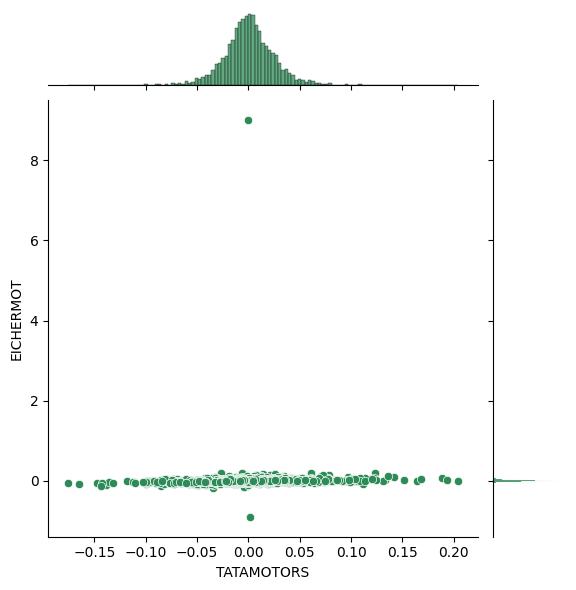

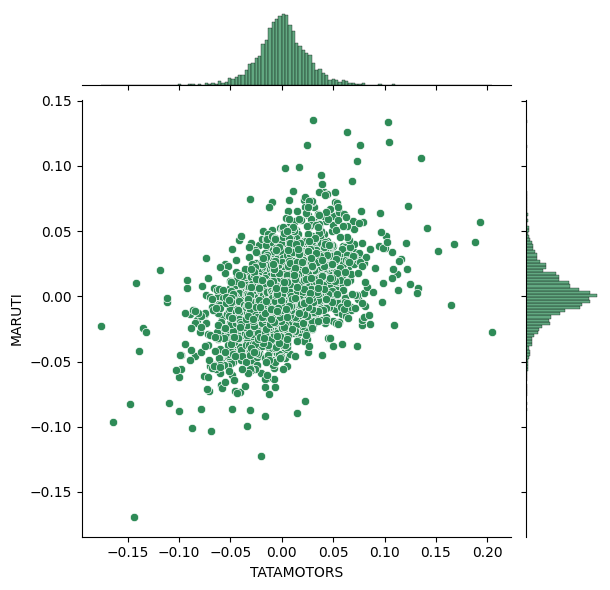

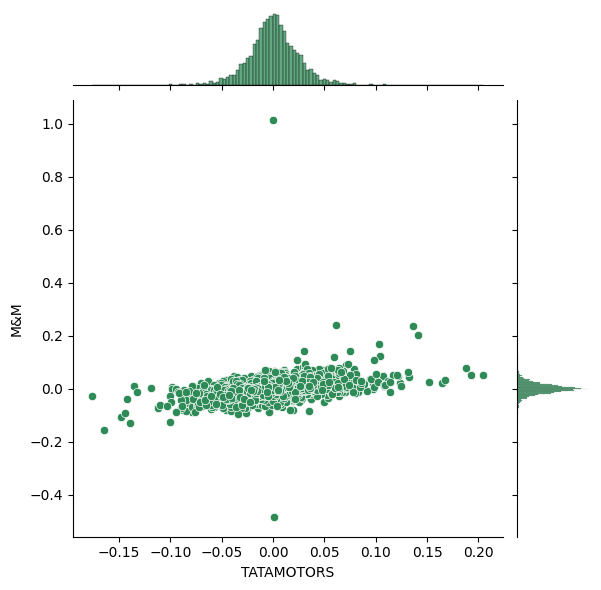

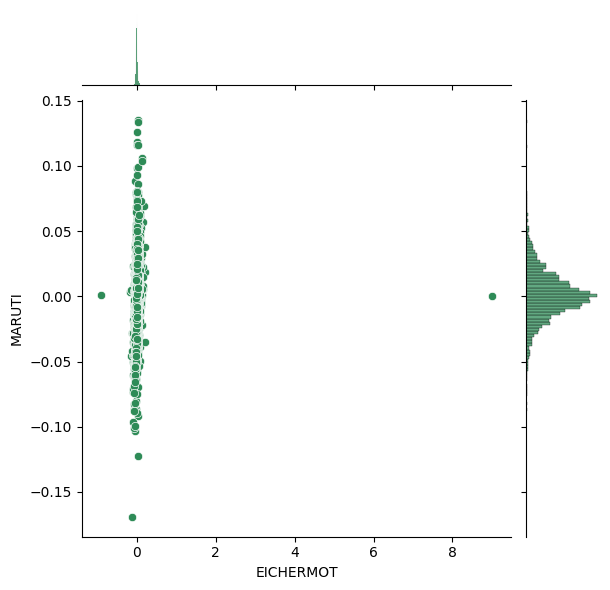

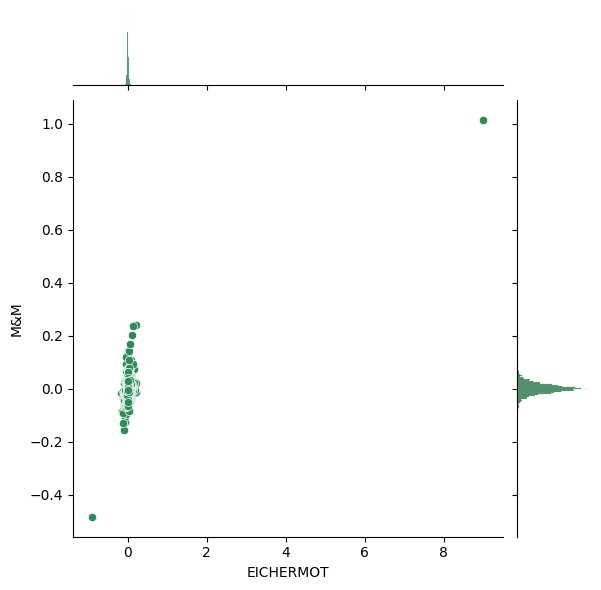

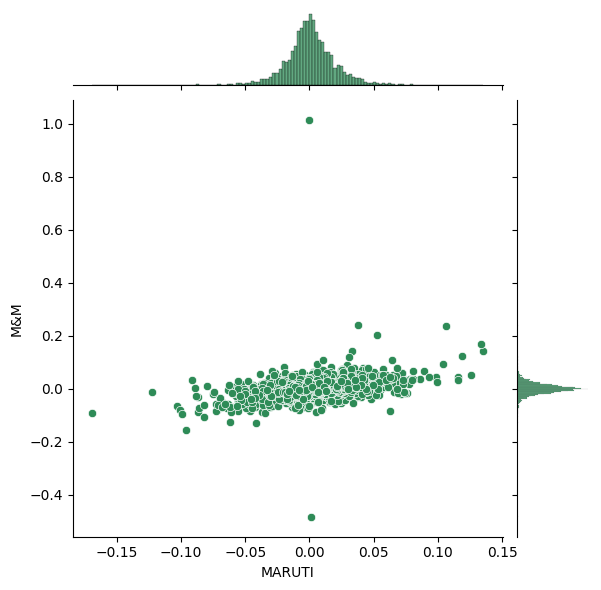

In [15]:
# Example usage:
create_joint_plots(Daily_Return)


In [16]:
Adj_closing = multi_in_one(data_dict, "Adj Close")
print(Adj_closing)

             TATAMOTORS    EICHERMOT        MARUTI          M&M
Date                                                           
2003-09-16    44.291676    11.759888    182.571365    22.350752
2003-09-17    44.032005    11.779157    189.182480    21.623936
2003-09-18    42.033417    11.343608    180.032013    20.330711
2003-09-19    42.961899    11.405278    180.163376    21.298130
2003-09-22    42.820271    11.424550    184.497757    21.393364
...                 ...          ...           ...          ...
2024-04-12  1018.500000  4302.250000  12266.549805  2070.949951
2024-04-15   998.799988  4219.350098  12422.849609  2053.449951
2024-04-16   992.799988  4355.700195  12502.700195  2031.300049
2024-04-18   971.349976  4351.200195  12405.000000  2024.949951
2024-04-19   963.200012  4344.149902  12710.950195  2082.899902

[5098 rows x 4 columns]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

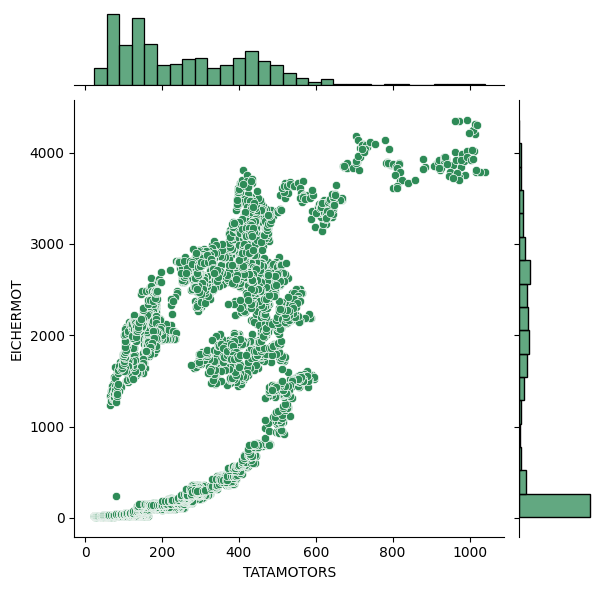

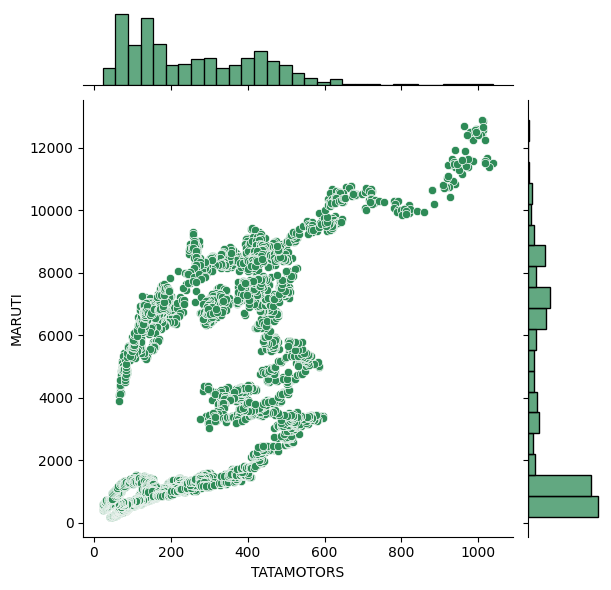

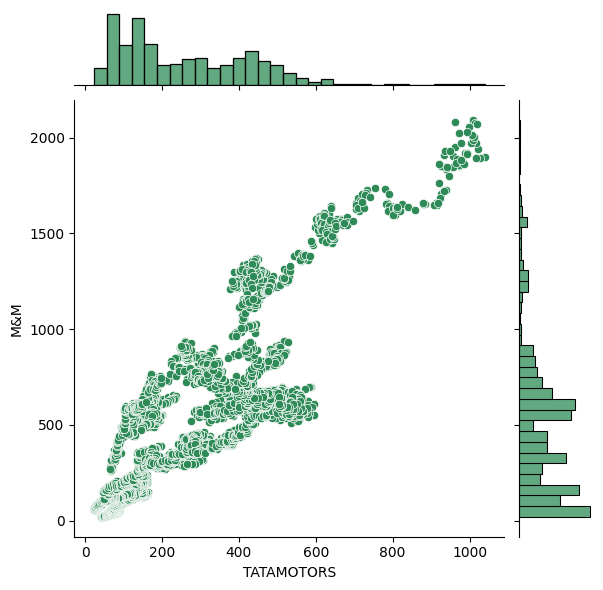

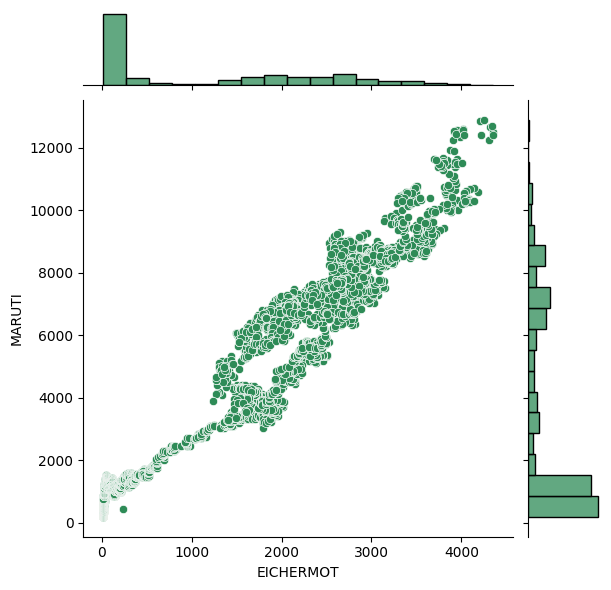

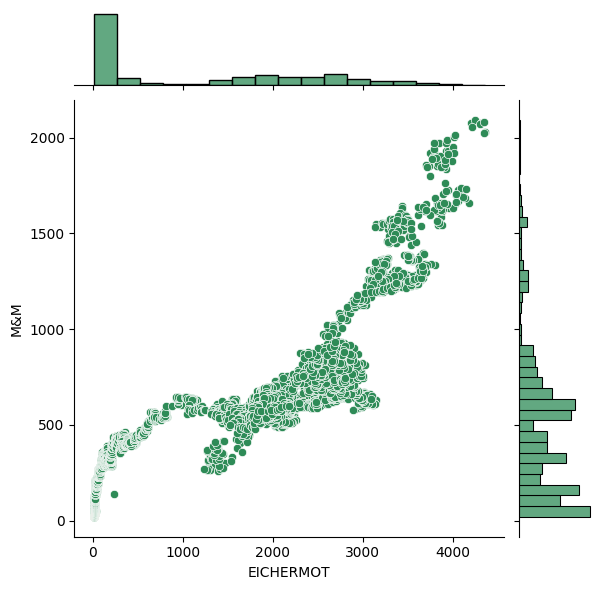

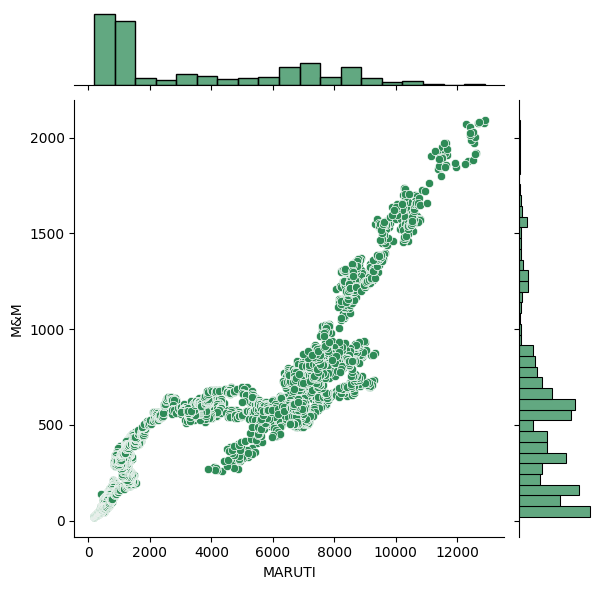

In [17]:
create_joint_plots(Adj_closing)

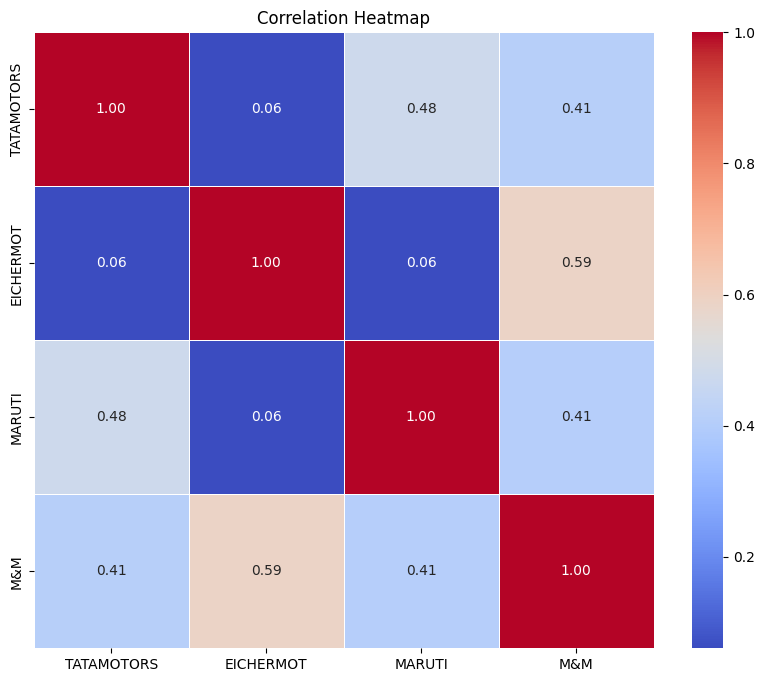

In [18]:
create_correlation_heatmap(Daily_Return)


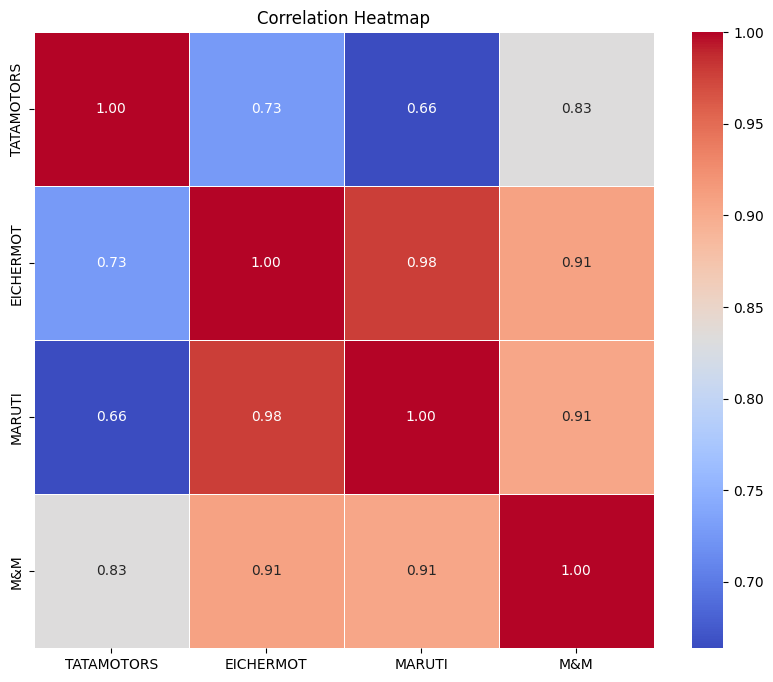

In [19]:
create_correlation_heatmap(Adj_closing)

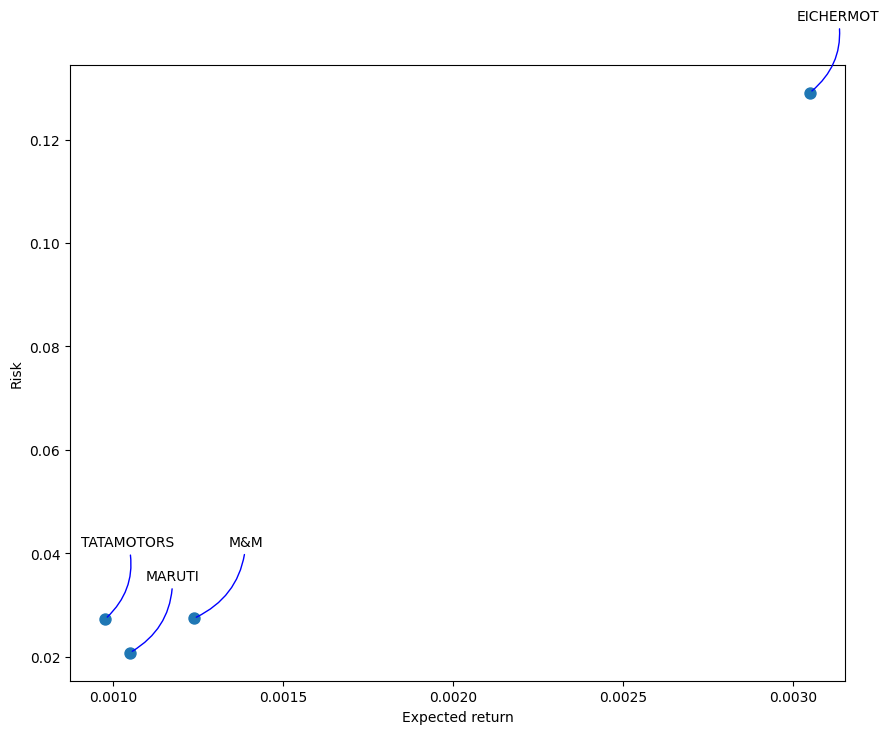

In [20]:

# Drop rows with NaN values
rets = Daily_Return.dropna()

# Calculate the area for the scatter plot points
area = np.pi * 20

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

# Annotate each point with the asset label
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# Show the plot
plt.show()


In [21]:
data_dict["TATAMOTORS"].columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'RSI', 'MA50',
       'MA20', 'MA10', 'Daily Return', 'company_name'],
      dtype='object')

In [22]:


def download_nifty50_price_history():
    # Define the ticker symbol for Nifty 50
    nifty50_ticker = "^NSEI"
    
    # Download historical data
    nifty50_data = yf.download(nifty50_ticker, start="1996-04-23", end=datetime.now())
    
    return nifty50_data

# Call the function to download Nifty 50 price history
nifty50_history = download_nifty50_price_history()

# Print the first few rows of the data
nifty50_history


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0
...,...,...,...,...,...,...
2024-04-12,22677.400391,22726.449219,22503.750000,22519.400391,22519.400391,357200
2024-04-15,22339.050781,22427.449219,22259.550781,22272.500000,22272.500000,355500
2024-04-16,22125.300781,22213.750000,22079.449219,22147.900391,22147.900391,317300


In [23]:
get_data("^NSEI")
get_table("^NSEI")

[*********************100%%**********************]  1 of 1 completed
/tmp/ipykernel_24/1612051865.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dict[data]['Daily Return'] = data_dict[data]['Adj Close'].pct_change()
/tmp/ipykernel_24/1612051865.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dict[data]['company_name']=data


,Open,High,Low,Close,Adj Close,Volume,RSI,MA50,MA20,MA10,Daily Return,company_name
Date,,,,,,,,,,,,
2007-11-27,5729.250000,5743.549805,5655.600098,5698.149902,5698.149902,0,46.179454,5440.556992,5777.994995,5756.425000,NaN,^NSEI
2007-11-28,5699.549805,5749.950195,5595.500000,5617.549805,5617.549805,0,43.315473,5463.014990,5765.434985,5724.389990,-0.014145,^NSEI
2007-11-29,5617.799805,5725.000000,5612.100098,5634.600098,5634.600098,0,47.249500,5484.782988,5752.132495,5696.639990,0.003035,^NSEI
2007-11-30,5633.899902,5782.549805,5632.649902,5762.750000,5762.750000,0,56.005439,5505.390986,5746.947485,5682.229980,0.022743,^NSEI
2007-12-03,5765.450195,5878.799805,5754.600098,5865.000000,5865.000000,0,56.857516,5527.739990,5743.577490,5677.964990,0.017743,^NSEI
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-12,22677.400391,22726.449219,22503.750000,22519.400391,22519.400391,357200,73.672414,22125.633984,22270.222461,22528.745312,-0.010302,^NSEI
2024-04-15,22339.050781,22427.449219,22259.550781,22272.500000,22272.500000,355500,58.622045,22140.641992,22283.962500,22523.305273,-0.010964,^NSEI
2024-04-16,22125.300781,22213.750000,22079.449219,22147.900391,22147.900391,317300,51.649208,22149.086016,22284.025000,22491.895313,-0.005594,^NSEI


In [24]:
# Create a new dataframe with only the 'Close column 
data = data_dict["TATAMOTORS"].filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

6709

In [25]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.06771171],
       [0.06583834],
       [0.06670512],
       ...,
       [0.95476789],
       [0.93390278],
       [0.92597504]])

In [26]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.06771171, 0.06583834, 0.06670512, 0.06763715, 0.06702201,
       0.06682628, 0.06720841, 0.06646279, 0.06646279, 0.06770239,
       0.06772103, 0.06853189, 0.0686717 , 0.07078739, 0.07355552,
       0.07293106, 0.07384444, 0.07231592, 0.07226   , 0.07129069,
       0.07129069, 0.07163554, 0.07049847, 0.07190583, 0.07202699,
       0.07192446, 0.07439434, 0.07578306, 0.07964165, 0.07924088,
       0.07927815, 0.07869098, 0.07921291, 0.08226064, 0.077964  ,
       0.07850457, 0.07680828, 0.0781504 , 0.08057367, 0.07982805,
       0.07821565, 0.076771  , 0.07697605, 0.07804788, 0.07719042,
       0.07487899, 0.07534501, 0.07582966, 0.07985601, 0.08109561,
       0.08098376, 0.0786537 , 0.07842069, 0.07872826, 0.07860709,
       0.07939932, 0.0786537 , 0.07778691, 0.08022882, 0.07926883])]
[0.0794086366390535]

[array([0.06771171, 0.06583834, 0.06670512, 0.06763715, 0.06702201,
       0.06682628, 0.06720841, 0.06646279, 0.06646279, 0.06770239,
       0.06772103, 0.06853189, 0.068

In [27]:
from setuptools import setup, find_packages
from setuptools.extension import Extension
from setuptools.command.build_ext import build_ext
import numpy as np

# Define your LSTM model using Keras with TensorFlow backend
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


2024-04-21 13:13:00.483688: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-21 13:13:00.483789: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-21 13:13:00.592150: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6649/6649 ━━━━━━━━━━━━━━━━━━━━ 42s 6ms/step - loss: 5.2969e-04


In [28]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


11.112123405228775

/tmp/ipykernel_24/1867773827.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


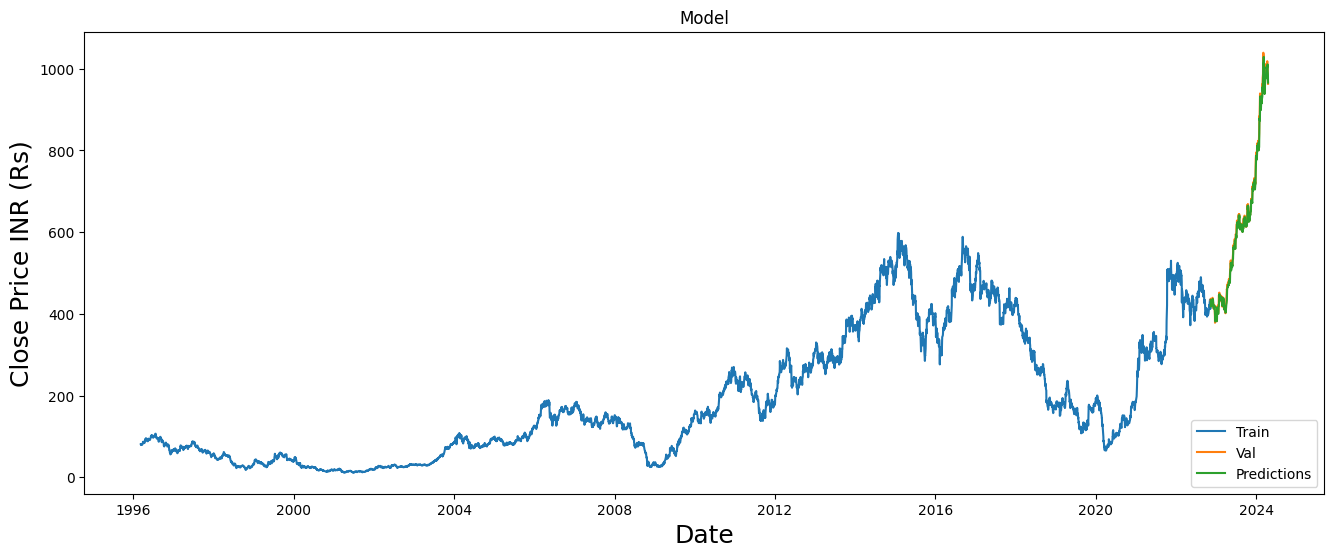

In [29]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR (Rs)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [30]:

valid['diff_per']=(valid['Close']-valid['Predictions'])/(valid['Close'])
valid

/tmp/ipykernel_24/2212216689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['diff_per']=(valid['Close']-valid['Predictions'])/(valid['Close'])


,Close,Predictions,diff_per
Date,,,
2022-11-14,433.700012,418.507507,0.035030
2022-11-15,437.149994,428.481171,0.019830
2022-11-16,431.549988,434.318268,-0.006415
2022-11-17,423.149994,431.261383,-0.019169
2022-11-18,423.799988,423.430481,0.000872
...,...,...,...
2024-04-12,1018.500000,1005.259399,0.013000
2024-04-15,998.799988,1010.741760,-0.011956
2024-04-16,992.799988,993.680237,-0.000887


In [31]:
statistics = valid['diff_per'].describe()
statistics

count    353.000000
mean       0.006743
std        0.015620
min       -0.045032
25%       -0.002962
50%        0.006253
75%        0.016114
max        0.063649
Name: diff_per, dtype: float64

In [32]:
import pandas as pd

# Assuming 'valid' is your DataFrame containing the data

# Specify the file path where you want to save the CSV file
file_path = "valid_data.csv"

# Save the DataFrame as a CSV file
valid.to_csv(file_path, index=True)

print("DataFrame 'valid' has been saved as a CSV file.")


DataFrame 'valid' has been saved as a CSV file.


In [33]:
valid.columns

Index(['Close', 'Predictions', 'diff_per'], dtype='object')

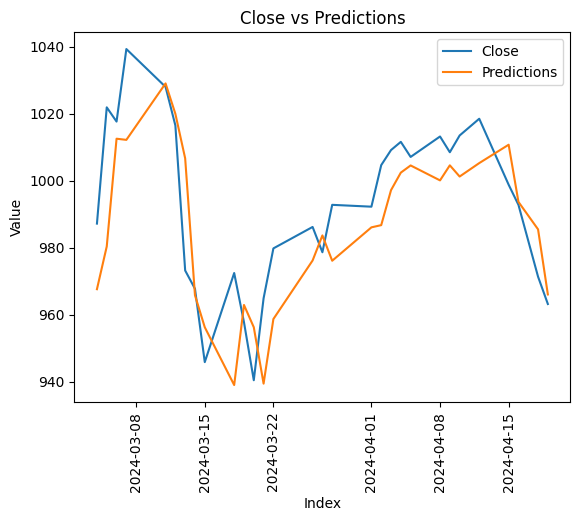

In [34]:
import matplotlib.pyplot as plt

# Assuming 'valid' is your DataFrame containing the data
# 'Close' and 'Predictions' are the columns to be plotted

# Select the tail 30 values
subset = valid.tail(30)

# Plot the 'Close' column
plt.plot(subset.index, subset['Close'], label='Close')

# Plot the 'Predictions' column
plt.plot(subset.index, subset['Predictions'], label='Predictions')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Close vs Predictions')

# Add legend
plt.legend()

# Rotate x-axis tick labels vertically
plt.xticks(rotation='vertical')

# Show the plot
plt.show()
